In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [140]:
df= pd.read_csv('../cleaned-data.csv')

- Add price per sqm to each property

In [141]:
df['price_per_sqm'] = round(df['price'] / df['living_area'])

- Group by communes

In [142]:
# group by commune
be_communes = df.groupby('commune')

# count the number of observations per commune
communes_size = be_communes.size()

# Find communes with at least 20 observations
valid_size_communes = communes_size[communes_size >= 20].index

#### Find and visualize the most expensive communes in Belgium

- By average price:

In [143]:
# get most expensive communes per average price
expensive = pd.DataFrame(be_communes['price'].mean().loc[valid_size_communes].sort_values(ascending=False).head())
expensive

,price
commune,
Westkapelle,1.528548e+06
Plancenoit,1.242654e+06
Sterrebeek,1.192773e+06
La Hulpe,1.023857e+06
Brasschaat,8.799045e+05


In [144]:
# For visualizations
my_palette = ['#2D3880', '#615EDB', '#8382D1', '#9D9DE4', '#CBCBEB']

C:\Users\celin\AppData\Local\Temp\ipykernel_23516\525458854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  expensive_g = sns.barplot(x='price',


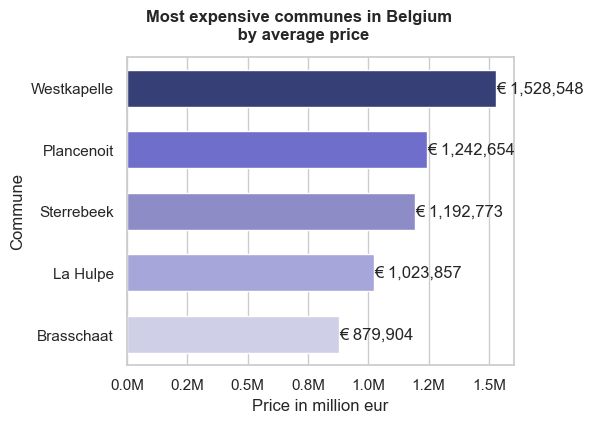

In [145]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(5, 4))

expensive_g = sns.barplot(x='price', 
                        y='commune',
                        data=expensive, 
                        palette=my_palette,
                        width=0.6)

#expensive_g.set_title('Most expensive communes in Belgium per average price', loc='center', y=1.03, fontsize=12, weight='bold')
expensive_g.set(xlabel='Price in million eur', ylabel='Commune')
expensive_g.text(0.45, 1.05, 'Most expensive communes in Belgium \n by average price', ha='center', va='bottom', fontsize=12, weight='bold', transform=expensive_g.transAxes)

# change 1.50 to 1.5M
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))


# Add bar value to each bar
for p in expensive_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    expensive_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

- By median price:

In [146]:
# get most expensive communes per median price
expensive_median = pd.DataFrame(be_communes['price'].median().loc[valid_size_communes].sort_values(ascending=False).head())
expensive_median

,price
commune,
Westkapelle,1185000.0
Sterrebeek,1145000.0
Plancenoit,995000.0
Ramskapelle,760000.0
Keerbergen,759000.0


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\2313146971.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  expensive_median_g = sns.barplot(x='price',


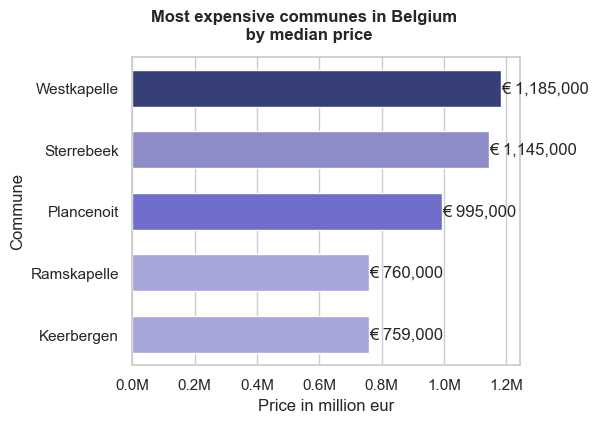

In [147]:
my_palette2 = ['#2D3880','#8382D1', '#615EDB',  '#9D9DE4', '#9D9DE4']

sns.set_theme(style='whitegrid')
plt.figure(figsize=(5, 4))

expensive_median_g = sns.barplot(x='price', 
                        y='commune',
                        data=expensive_median, 
                        palette=my_palette2,
                        width=0.6)

#expensive_g.set_title('Most expensive communes in Belgium per average price', loc='center', y=1.03, fontsize=12, weight='bold')
expensive_median_g.set(xlabel='Price in million eur', ylabel='Commune')
expensive_median_g.text(0.45, 1.05, 'Most expensive communes in Belgium \n by median price', ha='center', va='bottom', fontsize=12, weight='bold', transform=expensive_median_g.transAxes)

# change 1.50 to 1.5M
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))


# Add bar value to each bar
for p in expensive_median_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    expensive_median_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

- By average price per square meter:

In [148]:
# get most expensive communes per average price per sqm 
expensive_avg_sqm = pd.DataFrame(be_communes['price_per_sqm'].mean().loc[valid_size_communes].sort_values(ascending=False).head())
expensive_avg_sqm

,price_per_sqm
commune,
Westkapelle,11281.274510
Waardamme,10867.696970
Ramskapelle,7348.657143
Leuven,6289.827225
Sterrebeek,6001.000000


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\3336674379.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  expensive_avg_sqm_g = sns.barplot(x='price_per_sqm',


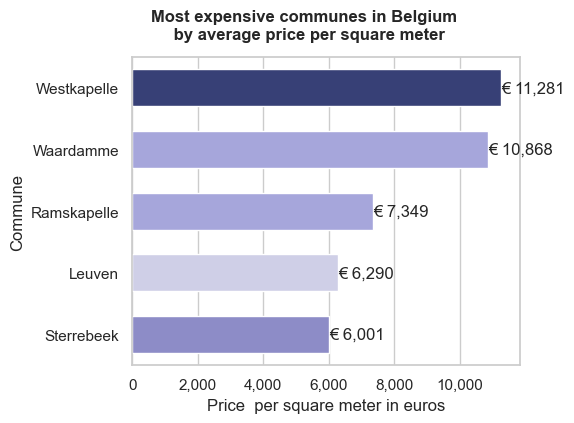

In [149]:
my_palette3 = ['#2D3880', '#9D9DE4', '#9D9DE4','#CBCBEB', '#8382D1']
plt.figure(figsize=(5, 4))

expensive_avg_sqm_g = sns.barplot(x='price_per_sqm', 
                        y='commune',
                        data=expensive_avg_sqm, 
                        palette=my_palette3,
                        width=0.6)

#expensive_g.set_title('Most expensive communes in Belgium per average price', loc='center', y=1.03, fontsize=12, weight='bold')
expensive_avg_sqm_g.set(xlabel='Price  per square meter in euros', ylabel='Commune')
expensive_avg_sqm_g.text(0.45, 1.05, 'Most expensive communes in Belgium \n by average price per square meter', ha='center', va='bottom', fontsize=12, weight='bold', transform=expensive_avg_sqm_g.transAxes)

# correct price display
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1:,.0f}'))


# Add bar value to each bar
for p in expensive_avg_sqm_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    expensive_avg_sqm_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width/1:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

#### Find and visualize the most expensive communes in Flanders

Separate the different provinces per region:

In [150]:
## Flanders  + Wallonia
flemish_provinces = {'Antwerpen', 'Limburg', 'Oost-Vlaanderen', 'Vlaams Brabant', 'West-Vlaanderen', 'Bruxelles'}
walloon_provinces = {'Brabant Wallon', 'Hainaut', 'Liège', 'Luxembourg', 'Namur'}
#bruxelles = 'Bruxelles'

In [151]:
flemish_region = df[df['province'].isin(flemish_provinces)]
walloon_region = df[df['province'].isin(walloon_provinces)]

Group the Flemish region by commune:

In [152]:
# group Flanders by commune
flanders_communes_groups = flemish_region.groupby('commune')

# count the number of observations per commune
flanders_commune_size = flanders_communes_groups.size()

# Find communes with at least 20 observations
fl_valid_commune_size = flanders_commune_size[flanders_commune_size >= 20].index

- Most expensive flemish communes by average price:

In [153]:
# Most expensive communies in vlaanderen by mean
flanders_exp_avg = pd.DataFrame(flanders_communes_groups['price'].mean().loc[fl_valid_commune_size].sort_values(ascending=False).head())
flanders_exp_avg

,price
commune,
Westkapelle,1.528548e+06
Sterrebeek,1.192773e+06
Brasschaat,8.799045e+05
Schilde,8.629853e+05
Keerbergen,8.268696e+05


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\3946367237.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  exp_flanders_avg_g = sns.barplot(x='price',


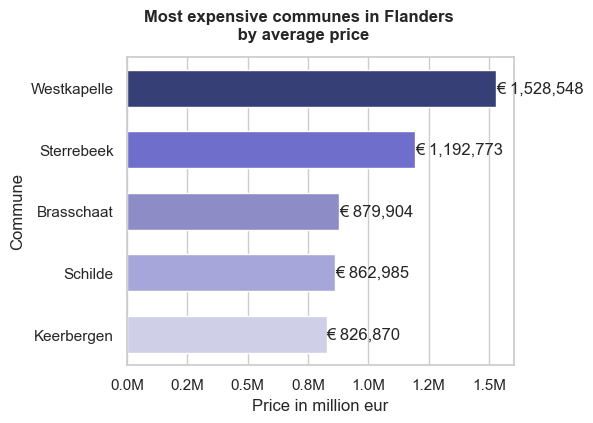

In [154]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(5, 4))

exp_flanders_avg_g = sns.barplot(x='price', 
                        y='commune',
                        data=flanders_exp_avg, 
                        palette=my_palette,
                        width=0.6)

exp_flanders_avg_g.set(xlabel='Price in million eur', ylabel='Commune')
exp_flanders_avg_g.text(0.45, 1.05, 'Most expensive communes in Flanders \n by average price', ha='center', va='bottom', fontsize=12, weight='bold', transform=exp_flanders_avg_g.transAxes)

# change 1.50 to 1.5M
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))


# Add bar value to each bar
for p in exp_flanders_avg_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    exp_flanders_avg_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

- By median price:

In [155]:
# Most expensive communies in vlaanderen by MEDIAN price
flanders_exp_median = pd.DataFrame(flanders_communes_groups['price'].median().loc[fl_valid_commune_size].sort_values(ascending=False).head())
flanders_exp_median

,price
commune,
Westkapelle,1185000.0
Sterrebeek,1145000.0
Ramskapelle,760000.0
Keerbergen,759000.0
Wezembeek-Oppem,747000.0


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\1236288464.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  flanders_exp_median_g = sns.barplot(x='price',


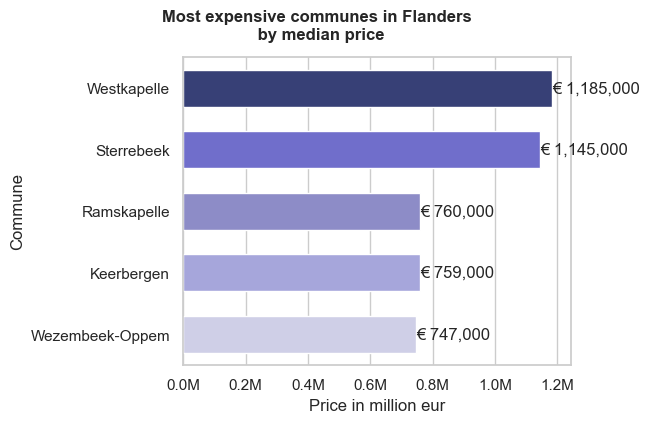

In [156]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(5, 4))

flanders_exp_median_g = sns.barplot(x='price', 
                        y='commune',
                        data=flanders_exp_median, 
                        palette=my_palette,
                        width=0.6)

flanders_exp_median_g.set(xlabel='Price in million eur', ylabel='Commune')
flanders_exp_median_g.text(0.35, 1.05, 'Most expensive communes in Flanders \n by median price', ha='center', va='bottom', fontsize=12, weight='bold', transform=flanders_exp_median_g.transAxes)

# change 1.50 to 1.5M
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M'))


# Add bar value to each bar
for p in flanders_exp_median_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    flanders_exp_median_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width/1:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

- By average price per square meter:

In [157]:
# Most expensive communies in vlaanderen per avg sqm
flanders_exp_sqm = pd.DataFrame(flanders_communes_groups['price_per_sqm'].mean().loc[fl_valid_commune_size].sort_values(ascending=False).head())
flanders_exp_sqm

,price_per_sqm
commune,
Westkapelle,11281.274510
Waardamme,10867.696970
Ramskapelle,7348.657143
Leuven,6289.827225
Sterrebeek,6001.000000


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\870126771.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  flanders_exp_sqm_g = sns.barplot(x='price_per_sqm',


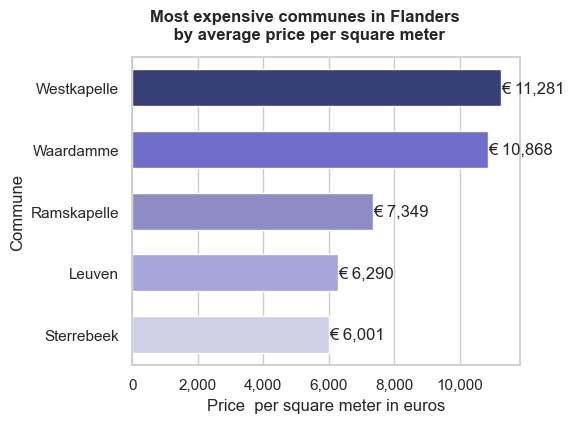

In [158]:
plt.figure(figsize=(5, 4))

flanders_exp_sqm_g = sns.barplot(x='price_per_sqm', 
                        y='commune',
                        data=flanders_exp_sqm, 
                        palette=my_palette,
                        width=0.6)

flanders_exp_sqm_g.set(xlabel='Price  per square meter in euros', ylabel='Commune')
flanders_exp_sqm_g.text(0.45, 1.05, 'Most expensive communes in Flanders \n by average price per square meter', ha='center', va='bottom', fontsize=12, weight='bold', transform=flanders_exp_sqm_g.transAxes)

# correct price display
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1:,.0f}'))


# Add bar value to each bar
for p in flanders_exp_sqm_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    flanders_exp_sqm_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width/1:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

#### Find and visualiza the most expensive communes in Wallonia

Group the walloon region by commune:

In [159]:
#### Wallonia ####

# group Wallonia by commune
wallonia_communes_groups = walloon_region.groupby('commune')

# count the number of observations per commune
wallonia_commune_size = wallonia_communes_groups.size()

# Find communes with at least 20 observations
wa_valid_commune_size = wallonia_commune_size[wallonia_commune_size >= 20].index

The most expensive communes in Wallonia by average price:

In [160]:
# Most expensive communies in Wallonia by mean price
wallonia_exp_avg = pd.DataFrame(wallonia_communes_groups['price'].mean().loc[wa_valid_commune_size].sort_values(ascending=False).head())
wallonia_exp_avg

,price
commune,
Plancenoit,1.242654e+06
La Hulpe,1.023857e+06
Longueville,6.240676e+05
Louvain-la-Neuve,5.954324e+05
Waterloo,5.597865e+05


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\184204877.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  exp_wallonia_avg_g = sns.barplot(x='price',


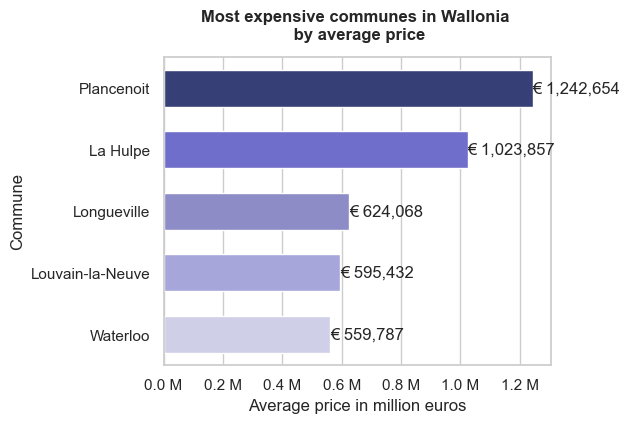

In [161]:
plt.figure(figsize=(5, 4))

exp_wallonia_avg_g = sns.barplot(x='price', 
                        y='commune',
                        data=wallonia_exp_avg, 
                        palette=my_palette,
                        width=0.6)

exp_wallonia_avg_g.set(xlabel='Average price in million euros', ylabel='Commune')
exp_wallonia_avg_g.text(0.5, 1.05, 'Most expensive communes in Wallonia \n by average price', ha='center', va='bottom', fontsize=12, weight='bold', transform=exp_wallonia_avg_g.transAxes)

# change 1.50 to 1.5M
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:,.1f} M'))


# Add bar value to each bar
for p in exp_wallonia_avg_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    exp_wallonia_avg_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width/1:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

- By median price:

In [162]:
# Most expensive communies in Wallonia by MEDIAN price
wallonia_exp_median = pd.DataFrame(wallonia_communes_groups['price'].median().loc[wa_valid_commune_size].sort_values(ascending=False).head())
wallonia_exp_median

,price
commune,
Plancenoit,995000.0
La Hulpe,649000.0
Longueville,560000.0
Waterloo,549000.0
Rixensart,515000.0


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\3962443988.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  exp_wallonia_median_g = sns.barplot(x='price',


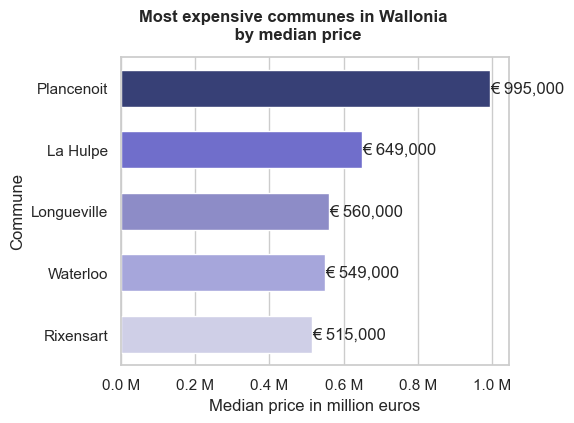

In [163]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(5, 4))

exp_wallonia_median_g = sns.barplot(x='price', 
                        y='commune',
                        data=wallonia_exp_median, 
                        palette=my_palette,
                        width=0.6)

exp_wallonia_median_g.set(xlabel='Median price in million euros', ylabel='Commune')
exp_wallonia_median_g.text(0.45, 1.05, 'Most expensive communes in Wallonia \n by median price', ha='center', va='bottom', fontsize=12, weight='bold', transform=exp_wallonia_median_g.transAxes)

# change 1.50 to 1.5M
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.1f} M'))


# Add bar value to each bar
for p in exp_wallonia_median_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    exp_wallonia_median_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width/1:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

- By average price per square meter:

In [164]:
wallonia_exp_sqm = pd.DataFrame(wallonia_communes_groups['price_per_sqm'].mean().loc[wa_valid_commune_size].sort_values(ascending=False).head())
wallonia_exp_sqm

,price_per_sqm
commune,
Louvain-la-Neuve,5061.540541
La Hulpe,4765.714286
Longueville,4040.695652
Rocourt,3840.046053
Waterloo,3823.078652


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\1697352591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  wallonia_exp_sqm_g = sns.barplot(x='price_per_sqm',


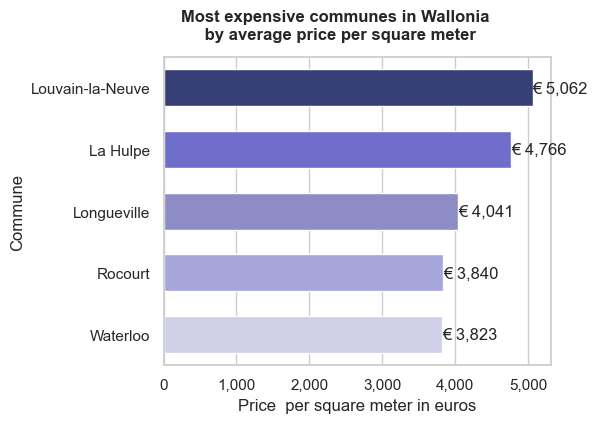

In [165]:
plt.figure(figsize=(5, 4))

wallonia_exp_sqm_g = sns.barplot(x='price_per_sqm', 
                        y='commune',
                        data=wallonia_exp_sqm, 
                        palette=my_palette,
                        width=0.6)

wallonia_exp_sqm_g.set(xlabel='Price  per square meter in euros', ylabel='Commune')
wallonia_exp_sqm_g.text(0.45, 1.05, 'Most expensive communes in Wallonia \n by average price per square meter', ha='center', va='bottom', fontsize=12, weight='bold', transform=wallonia_exp_sqm_g.transAxes)

# correct price display
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1:,.0f}'))


# Add bar value to each bar
for p in wallonia_exp_sqm_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    wallonia_exp_sqm_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width/1:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

#### Find and visualize the least expensive communes in Belgium

- By average price:

In [166]:
# Least expensive commune in Belgium by average price, mean price and price per square meter
be_affodable_mean = pd.DataFrame(be_communes['price'].mean().loc[valid_size_communes].sort_values().head())
be_affodable_mean

,price
commune,
Ougrée,159971.428571
Trivières,201540.114286
Tilleur,211145.301587
Jemeppe-sur-Meuse,211212.500000
Seraing,212033.678756


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\2442003568.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  be_affodable_mean_g = sns.barplot(x='price',


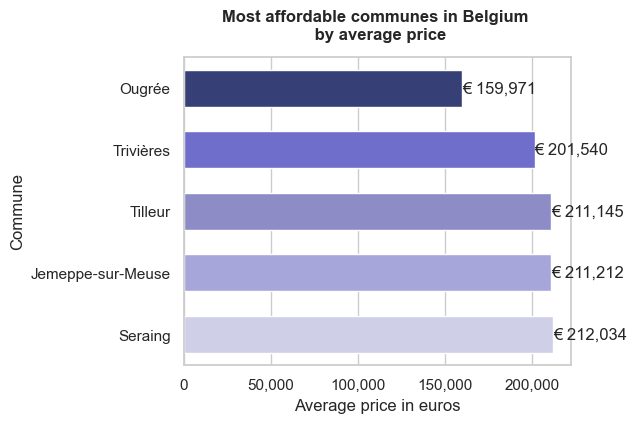

In [167]:
# Most affordable communes in Belgium by average price
plt.figure(figsize=(5, 4))

be_affodable_mean_g = sns.barplot(x='price', 
                        y='commune',
                        data=be_affodable_mean, 
                        palette=my_palette,
                        width=0.6)

be_affodable_mean_g.set(xlabel='Average price in euros', ylabel='Commune')
be_affodable_mean_g.text(0.5, 1.05, 'Most affordable communes in Belgium \n by average price', ha='center', va='bottom', fontsize=12, weight='bold', transform=be_affodable_mean_g.transAxes)

# change 1.50 to 1.5M
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))


# Add bar value to each bar
for p in be_affodable_mean_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    be_affodable_mean_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width/1:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

- By median price:

In [168]:
be_affodable_median = pd.DataFrame(be_communes['price'].median().loc[valid_size_communes].sort_values().head())
be_affodable_median

,price
commune,
Ougrée,169000.0
Trivières,186000.0
Wavreille,193750.0
Oostrozebeke,195000.0
Hermalle-sous-Huy,199000.0


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\1496275364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  be_affodable_median_g = sns.barplot(x='price',


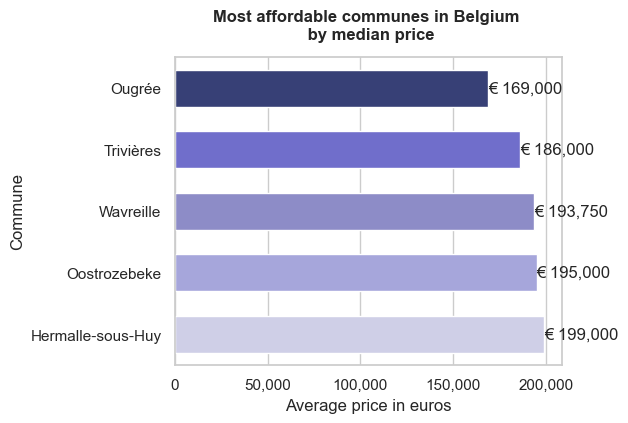

In [169]:
# Most affordable communes in Belgium by median price
plt.figure(figsize=(5, 4))

be_affodable_median_g = sns.barplot(x='price', 
                        y='commune',
                        data=be_affodable_median, 
                        palette=my_palette,
                        width=0.6)

be_affodable_median_g.set(xlabel='Average price in euros', ylabel='Commune')
be_affodable_median_g.text(0.5, 1.05, 'Most affordable communes in Belgium \n by median price', ha='center', va='bottom', fontsize=12, weight='bold', transform=be_affodable_median_g.transAxes)

# change 1.50 to 1.5M
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))


# Add bar value to each bar
for p in be_affodable_median_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    be_affodable_median_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width/1:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

- By average price per square meter:

In [170]:
be_affodable_sqm = pd.DataFrame(be_communes['price_per_sqm'].mean().loc[valid_size_communes].sort_values().head())
be_affodable_sqm

,price_per_sqm
commune,
Wavreille,1458.944444
Jemeppe-sur-Meuse,1530.343750
Hermalle-sous-Huy,1559.240000
Verviers,1604.703704
Herstal,1671.058824


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\4160273805.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  be_affodable_sqm_g = sns.barplot(x='price_per_sqm',


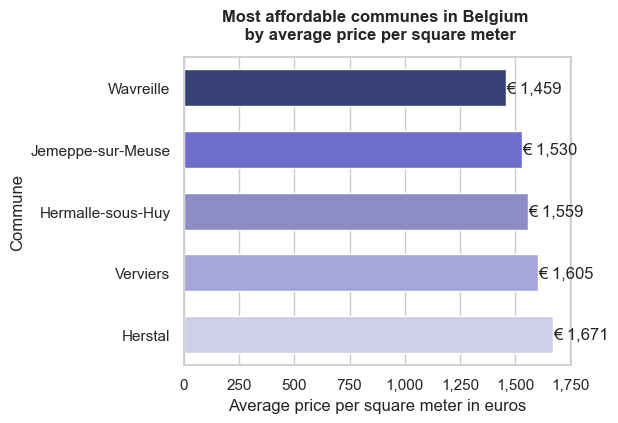

In [171]:
# Most affordable communes in Belgium by price per square meter
plt.figure(figsize=(5, 4))

be_affodable_sqm_g = sns.barplot(x='price_per_sqm', 
                        y='commune',
                        data=be_affodable_sqm, 
                        palette=my_palette,
                        width=0.6)

be_affodable_sqm_g.set(xlabel='Average price per square meter in euros', ylabel='Commune')
be_affodable_sqm_g.text(0.5, 1.05, 'Most affordable communes in Belgium \n by average price per square meter', ha='center', va='bottom', fontsize=12, weight='bold', transform=be_affodable_sqm_g.transAxes)

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))


# Add bar value to each bar
for p in be_affodable_sqm_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    be_affodable_sqm_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width/1:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

#### Find and visualize the least expensive communes in Flanders

- By average price:

In [172]:
# Most affordable communes in vlaanderen by mean
flanders_aff_avg = pd.DataFrame(flanders_communes_groups['price'].mean().loc[fl_valid_commune_size].sort_values().head())
flanders_aff_avg

,price
commune,
Oostrozebeke,247900.000000
Anderlecht,261387.277087
Vissenaken,283461.363636
Eeklo,287184.205479
Leopoldsburg,292528.985507


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\3794388032.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  flanders_aff_avg_g = sns.barplot(x='price',


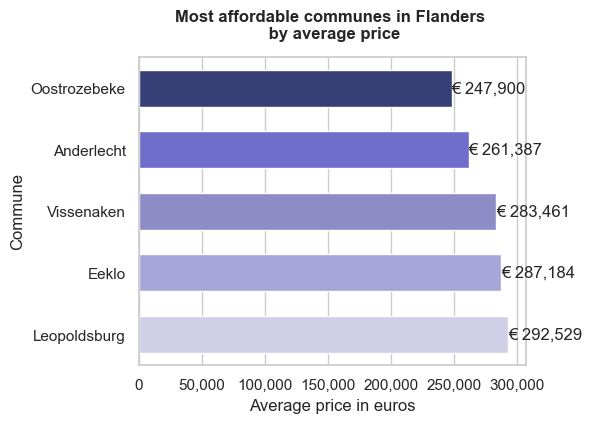

In [173]:
plt.figure(figsize=(5, 4))

flanders_aff_avg_g = sns.barplot(x='price', 
                        y='commune',
                        data=flanders_aff_avg, 
                        palette=my_palette,
                        width=0.6)

flanders_aff_avg_g.set(xlabel='Average price in euros', ylabel='Commune')
flanders_aff_avg_g.text(0.5, 1.05, 'Most affordable communes in Flanders \n by average price', ha='center', va='bottom', fontsize=12, weight='bold', transform=flanders_aff_avg_g.transAxes)

# change 1.50 to 1.5M
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))


# Add bar value to each bar
for p in flanders_aff_avg_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    flanders_aff_avg_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width/1:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

- By median price:

In [174]:
# Most affordable communes in vlaanderen by MEDIAN price
flanders_aff_median = pd.DataFrame(flanders_communes_groups['price'].median().loc[fl_valid_commune_size].sort_values().head())
flanders_aff_median

,price
commune,
Oostrozebeke,195000.0
Vissenaken,229500.0
Molenbeek-Saint-Jean,250000.0
Bredene,254000.0
Anderlecht,258650.0


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\4168967473.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  flanders_aff_median_g = sns.barplot(x='price',


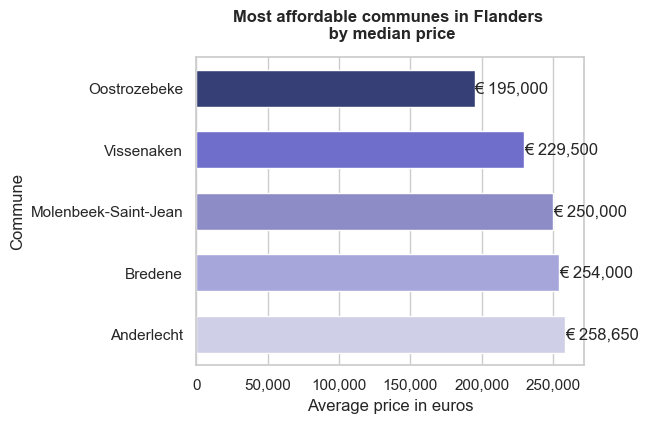

In [175]:
plt.figure(figsize=(5, 4))

flanders_aff_median_g = sns.barplot(x='price', 
                        y='commune',
                        data=flanders_aff_median, 
                        palette=my_palette,
                        width=0.6)

flanders_aff_median_g.set(xlabel='Average price in euros', ylabel='Commune')
flanders_aff_median_g.text(0.5, 1.05, 'Most affordable communes in Flanders \n by median price', ha='center', va='bottom', fontsize=12, weight='bold', transform=flanders_aff_median_g.transAxes)

# change 1.50 to 1.5M
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))


# Add bar value to each bar
for p in flanders_aff_median_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    flanders_aff_median_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width/1:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

- By average price per square meter:

In [176]:
flanders_aff_sqm = pd.DataFrame(flanders_communes_groups['price_per_sqm'].mean().loc[fl_valid_commune_size].sort_values().head())
flanders_aff_sqm

,price_per_sqm
commune,
Oostrozebeke,1690.285714
Zegelsem,1740.589744
Zulzeke,1751.350000
Rekkem,1904.000000
Heule,1963.000000


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\847680469.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  flanders_aff_sqm_g = sns.barplot(x='price_per_sqm',


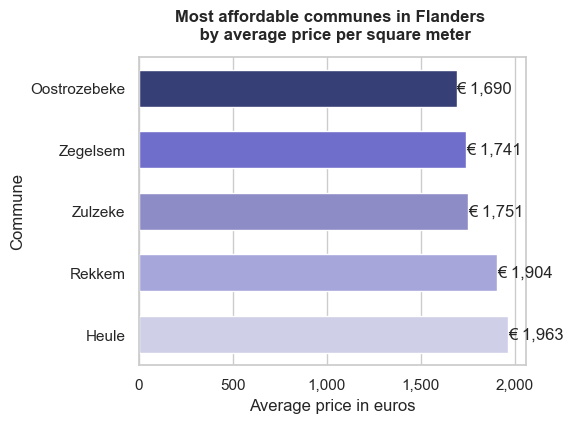

In [177]:
plt.figure(figsize=(5, 4))

flanders_aff_sqm_g = sns.barplot(x='price_per_sqm', 
                        y='commune',
                        data=flanders_aff_sqm, 
                        palette=my_palette,
                        width=0.6)

flanders_aff_sqm_g.set(xlabel='Average price in euros', ylabel='Commune')
flanders_aff_sqm_g.text(0.5, 1.05, 'Most affordable communes in Flanders \n by average price per square meter', ha='center', va='bottom', fontsize=12, weight='bold', transform=flanders_aff_sqm_g.transAxes)

# change 1.50 to 1.5M
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))


# Add bar value to each bar
for p in flanders_aff_sqm_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    flanders_aff_sqm_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width/1:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

#### Find and visualize the least expensive communes in Wallonia

- By average price:

In [178]:
# Most affordable communes in wallonia by mean price
wallonia_aff_avg = pd.DataFrame(wallonia_communes_groups['price'].mean().loc[wa_valid_commune_size].sort_values().head())
wallonia_aff_avg

,price
commune,
Ougrée,159971.428571
Trivières,201540.114286
Tilleur,211145.301587
Jemeppe-sur-Meuse,211212.500000
Seraing,212033.678756


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\2958185108.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  wallonia_aff_avg_g = sns.barplot(x='price',


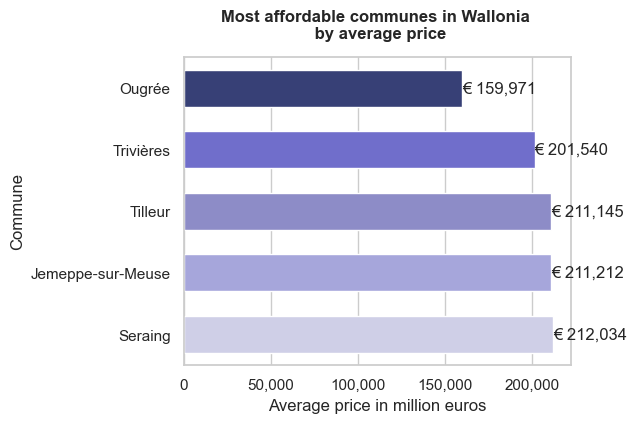

In [179]:
# Most affordable communes in wallonia by mean price
plt.figure(figsize=(5, 4))

wallonia_aff_avg_g = sns.barplot(x='price', 
                        y='commune',
                        data=wallonia_aff_avg, 
                        palette=my_palette,
                        width=0.6)

wallonia_aff_avg_g.set(xlabel='Average price in million euros', ylabel='Commune')
wallonia_aff_avg_g.text(0.5, 1.05, 'Most affordable communes in Wallonia \n by average price', ha='center', va='bottom', fontsize=12, weight='bold', transform=wallonia_aff_avg_g.transAxes)

# change 1.50 to 1.5M
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))


# Add bar value to each bar
for p in wallonia_aff_avg_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    wallonia_aff_avg_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width/1:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

- By median price:

In [180]:
# Most affordable communes in wallonia by MEDIAN price
wallonia_aff_median = pd.DataFrame(wallonia_communes_groups['price'].median().loc[wa_valid_commune_size].sort_values().head())
wallonia_aff_median

,price
commune,
Ougrée,169000.0
Trivières,186000.0
Wavreille,193750.0
Hermalle-sous-Huy,199000.0
Tilleur,199500.0


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\1473873496.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  wallonia_aff_median_g = sns.barplot(x='price',


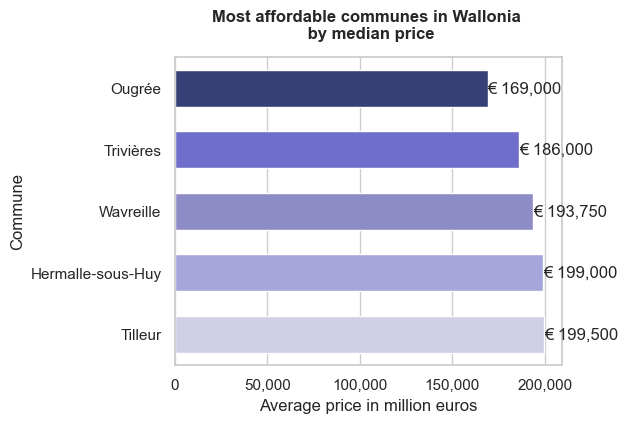

In [181]:
# Most affordable communes in wallonia by MEDIAN price
plt.figure(figsize=(5, 4))

wallonia_aff_median_g = sns.barplot(x='price', 
                        y='commune',
                        data=wallonia_aff_median, 
                        palette=my_palette,
                        width=0.6)

wallonia_aff_median_g.set(xlabel='Average price in million euros', ylabel='Commune')
wallonia_aff_median_g.text(0.5, 1.05, 'Most affordable communes in Wallonia \n by median price', ha='center', va='bottom', fontsize=12, weight='bold', transform=wallonia_aff_median_g.transAxes)

# change 1.50 to 1.5M
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))


# Add bar value to each bar
for p in wallonia_aff_median_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    wallonia_aff_median_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width/1:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()

- By averge price per square meter:

In [182]:
# Most affordable communes in wallonia by MEDIAN price
wallonia_aff_sqm = pd.DataFrame(wallonia_communes_groups['price_per_sqm'].median().loc[wa_valid_commune_size].sort_values().head())
wallonia_aff_sqm

,price_per_sqm
commune,
Wavreille,1260.5
Hermalle-sous-Huy,1543.0
Verviers,1612.0
Ougrée,1618.0
Jemeppe-sur-Meuse,1620.0


C:\Users\celin\AppData\Local\Temp\ipykernel_23516\3454148792.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  wallonia_aff_sqm_g = sns.barplot(x='price_per_sqm',


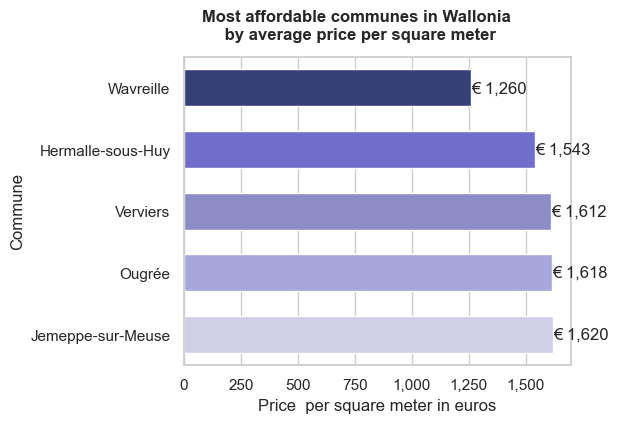

In [183]:
plt.figure(figsize=(5, 4))

wallonia_aff_sqm_g = sns.barplot(x='price_per_sqm', 
                        y='commune',
                        data=wallonia_aff_sqm, 
                        palette=my_palette,
                        width=0.6)

wallonia_aff_sqm_g.set(xlabel='Price  per square meter in euros', ylabel='Commune')
wallonia_aff_sqm_g.text(0.45, 1.05, 'Most affordable communes in Wallonia \n by average price per square meter', ha='center', va='bottom', fontsize=12, weight='bold', transform=wallonia_aff_sqm_g.transAxes)

# correct price display
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x/1:,.0f}'))


# Add bar value to each bar
for p in wallonia_aff_sqm_g.patches:
    # Get the width of each bar (the value of the bar in horizontal plots)
    width = p.get_width()
    # Place the value to the right of each bar
    wallonia_aff_sqm_g.text(width, p.get_y() + p.get_height() / 2, f'€ {width/1:,.0f}', 
            ha='left', va='center', fontsize=12, weight='normal')


plt.xticks(rotation=0)
plt.show()